<h1 align=center> Genealogical Classification </h1>


#### The "genetic_data_train.csv" file contains training data . It includes genetic information from 𝑁 = 183 individuals sampled from different populations worldwide. Each row represents an individual, and the columns contain the principal component values and the corresponding ancestry labels. The available ancestral categories are African, European, East Asian, Oceanian, and Native American.

#### The "genetic_data_test.csv" file contains test data . It includes genetic information from 𝑁 = 111 individuals, with each row representing an individual and the columns containing the principal component values and the corresponding ancestry labels. The test dataset also includes individuals with "Unknown" ancestry, as well as individuals with Mexican and African American ancestry. The five individuals with "Unknown" ancestry belong to one of the five ancestries represented in the training set, while the Mexican and African American individuals have varying degrees of ancestral proportions due to historical mixing.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay,roc_curve,auc
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.multiclass import OneVsRestClassifier

warnings.filterwarnings('ignore')

In [2]:
# loading training data
df1 = pd.read_csv('./genetic_data_train.csv')
df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African


In [3]:
# loading testing data
df2 = pd.read_csv('./genetic_data_test.csv')
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown


In [4]:
df2.Ancestry.unique()

array(['Unknown', 'Mexican', 'AfricanAmerican'], dtype=object)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       183 non-null    float64
 1   PC2       183 non-null    float64
 2   PC3       183 non-null    float64
 3   PC4       183 non-null    float64
 4   PC5       183 non-null    float64
 5   PC6       183 non-null    float64
 6   PC7       183 non-null    float64
 7   PC8       183 non-null    float64
 8   PC9       183 non-null    float64
 9   PC10      183 non-null    float64
 10  Ancestry  183 non-null    object 
dtypes: float64(10), object(1)
memory usage: 15.9+ KB


In [6]:
df1.shape

(183, 11)

In [7]:
df1.size

2013

In [8]:
df1.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       111 non-null    float64
 1   PC2       111 non-null    float64
 2   PC3       111 non-null    float64
 3   PC4       111 non-null    float64
 4   PC5       111 non-null    float64
 5   PC6       111 non-null    float64
 6   PC7       111 non-null    float64
 7   PC8       111 non-null    float64
 8   PC9       111 non-null    float64
 9   PC10      111 non-null    float64
 10  Ancestry  111 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.7+ KB


In [11]:
df2.shape

(111, 11)

In [12]:
df2.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [13]:
df2.duplicated().sum()

0

In [14]:
le = LabelEncoder()

In [15]:
df1['Ancestry_n'] = le.fit_transform(df1.Ancestry)

In [16]:
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,Ancestry_n
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African,0
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African,0
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178,4.562678,1.595991,-6.255160,-3.083079,0.155693,-2.509439,-1.186470,0.641546,2.893239,0.885596,NativeAmerican,3
179,4.559052,1.581629,-5.121037,-4.312312,0.021703,-0.787173,-1.838054,-0.118590,1.200644,0.885596,NativeAmerican,3
180,3.101335,1.477101,-5.759153,-2.083745,-0.750615,1.061579,-1.341655,-0.215556,-0.133415,0.885596,NativeAmerican,3
181,3.235086,-0.974829,-4.049595,0.020907,-0.489322,0.627622,0.087942,0.737715,3.262126,0.885596,NativeAmerican,3


In [17]:
 pd.crosstab(df1.Ancestry,df1.Ancestry_n)

Ancestry_n,0,1,2,3,4
Ancestry,,,,,
African,25,0,0,0,0
EastAsian,0,61,0,0,0
European,0,0,36,0,0
NativeAmerican,0,0,0,34,0
Oceanian,0,0,0,0,27


In [18]:
x = df1.iloc[:,:-2].values
y = df1.iloc[:,-1].values

In [19]:
sc = StandardScaler()

In [20]:
x = sc.fit_transform(x)

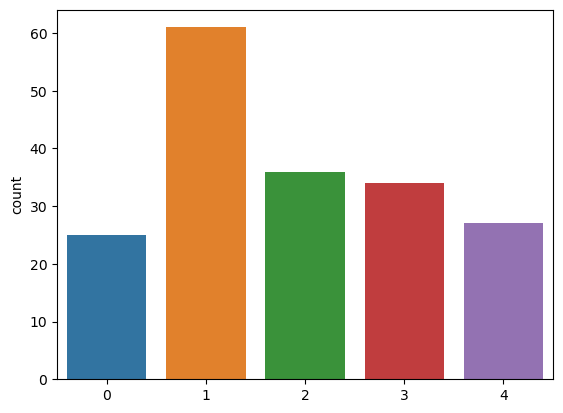

In [21]:
# plotting the distribution of ancestry
sns.countplot(x=y)
plt.show()

so treat imbalancing in the dataset we choose oversampling technique

In [22]:
sm = SMOTE()

In [23]:
x,y = sm.fit_resample(x,y)

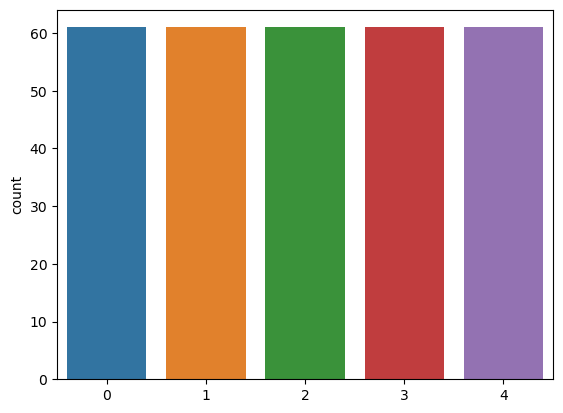

In [24]:
sns.countplot(x=y)
plt.show()

In [25]:
models = {'LogisticRegression':LogisticRegression(),
          'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
          'GradientBoostingClassifier':GradientBoostingClassifier(random_state=42),
         'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
         'RandomForestClassifier':RandomForestClassifier(random_state=42),
         'KNeighborsClassifier':KNeighborsClassifier()
         }

In [26]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring='accuracy',n_jobs= -1,cv=10)
    print(f'Cross validation of{name}')
    print('Mean score is:',np.mean(score))
    print("*"*100)

Cross validation ofLogisticRegression
Mean score is: 1.0
****************************************************************************************************
Cross validation ofAdaBoostClassifier
Mean score is: 0.8129032258064516
****************************************************************************************************
Cross validation ofGradientBoostingClassifier
Mean score is: 0.9935483870967742
****************************************************************************************************
Cross validation ofDecisionTreeClassifier
Mean score is: 0.9934408602150538
****************************************************************************************************
Cross validation ofRandomForestClassifier
Mean score is: 1.0
****************************************************************************************************
Cross validation ofKNeighborsClassifier
Mean score is: 1.0
******************************************************************************************

selecting random forest classifier

In [27]:
y = label_binarize(y,classes =[0,1,2,3,4])
n_classes = 5

In [28]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0))

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [30]:
y_score = clf.fit(x_train,y_train).predict_proba(x_test)

 Computing AUC and ROC for each class

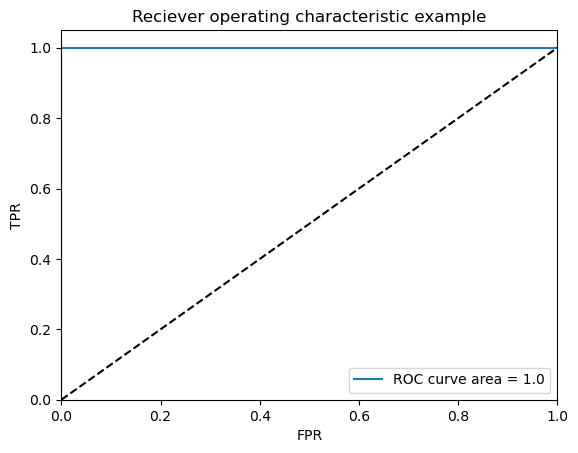

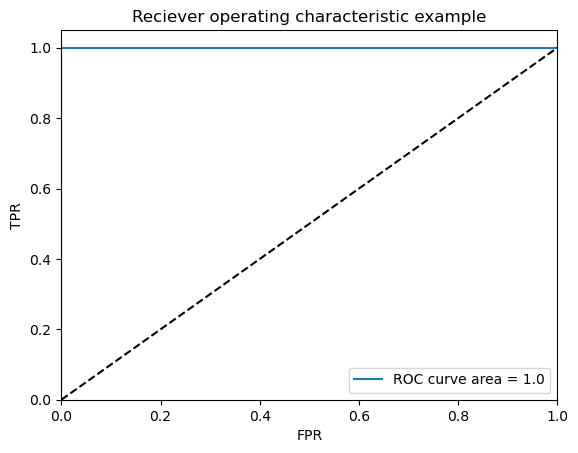

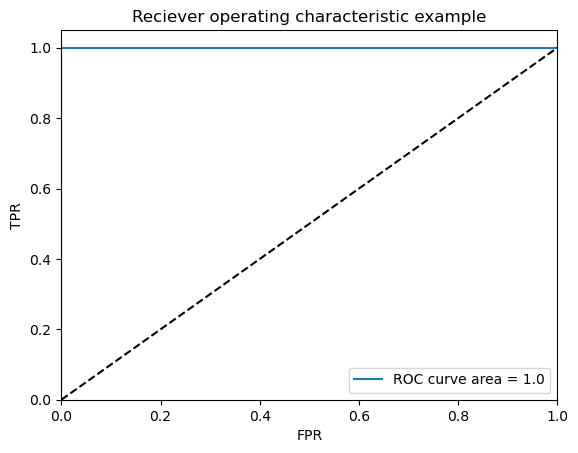

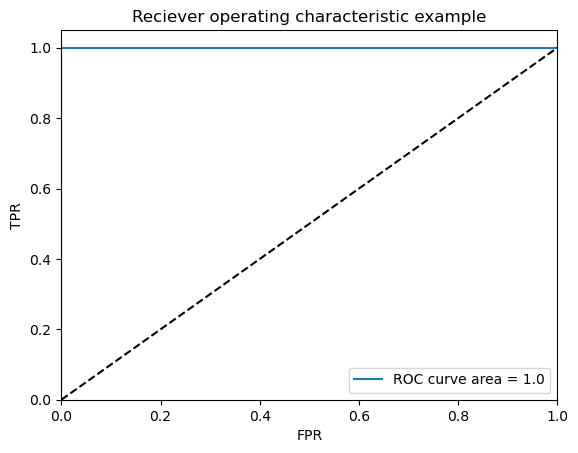

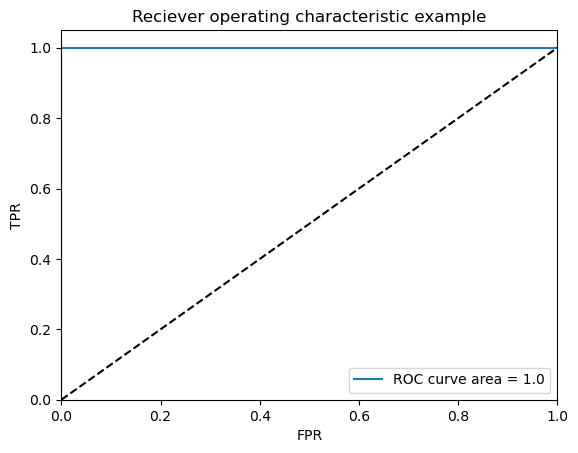

In [31]:
tpr = dict() #True positive rate
fpr = dict() #False positive rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
    
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = f'ROC curve area = {roc_auc[i]}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title("Reciever operating characteristic example")
    plt.legend(loc = 'lower right')

In [32]:
model = RandomForestClassifier(random_state=0,n_jobs=-1)

In [33]:
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown


In [34]:
df2.drop(columns='Ancestry',inplace=True)

In [35]:
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274


In [36]:
x =df1.iloc[:,:-2].values
y =df1.iloc[:,-1].values

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, shuffle= True,random_state= 0)

In [38]:
X = df2.iloc[:,:].values

In [39]:
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [40]:
Y = model.predict(X)

In [41]:
Y

array([4, 3, 2, 0, 1, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 2, 0,
       2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 0, 3, 2, 0, 3, 2, 3, 3, 2, 0, 3, 0,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 0, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [42]:
df2['Ancestry'] = pd.Series(Y)

In [43]:
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,4
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,3
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,2
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,0
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,1


In [44]:
pd.crosstab(df1.Ancestry,df1.Ancestry_n)

Ancestry_n,0,1,2,3,4
Ancestry,,,,,
African,25,0,0,0,0
EastAsian,0,61,0,0,0
European,0,0,36,0,0
NativeAmerican,0,0,0,34,0
Oceanian,0,0,0,0,27


In [45]:
df2['Ancestry_'] =df2.Ancestry.replace({0:'African',1:'East Asian',2:'European',3:'Native American',4:'Oceanian'})

In [46]:
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,Ancestry_
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,4,Oceanian
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,3,Native American
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,2,European
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,0,African
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,1,East Asian
...,...,...,...,...,...,...,...,...,...,...,...,...
106,-11.030349,1.712786,-1.392893,-0.163989,3.623641,-0.263645,-3.337796,2.279226,-2.632659,-0.671274,0,African
107,-7.994173,0.045333,-0.738547,0.189793,-2.545140,-0.332066,0.026289,-1.840944,-0.456438,-0.671274,0,African
108,-8.874531,2.074620,-2.060999,-0.898143,-1.372896,-3.175091,2.325163,-1.256258,-0.133253,-0.671274,0,African
109,-7.017063,-0.199721,-1.469538,-1.997714,1.892038,-1.880466,-3.278863,-0.336890,0.042410,-0.671274,0,African


From the testing data classified ancestry of each individuals.